In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task1.csv")

In [ ]:
df

,Unnamed: 0,speakers,utterances,emotions
0,0,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,1,indu,"ok, chalo rosesh chalo bahar",contempt
2,2,rosesh,momma! hath chhodiye dad!,anger
3,3,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,4,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral
...,...,...,...,...
8501,8501,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness
8502,8502,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger
8503,8503,maya,ahan!,joy
8504,8504,sita or geeta,goodbye!,fear


In [ ]:
df=df.drop(['Unnamed: 0','speakers'],axis=1)

In [ ]:
df

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['emotions'].value_counts()

In [ ]:
df_ne=df[df['emotions']=='neutral']

In [ ]:
df_ne=df_ne.sample(3000)

In [ ]:
df_re= df[df['emotions'] != 'neutral'].reset_index(drop=True)


In [ ]:
df_re

In [ ]:
combined_df = pd.concat([df_re, df_ne], ignore_index=True)

In [ ]:
combined_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
combined_df=combined_df.dropna()

In [ ]:
combined_df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df_val=pd.read_csv('/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task1val.csv')

In [ ]:
df_val=df_val.drop(['Unnamed: 0','speakers'],axis=1)

In [ ]:
df_val

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_val.groupby('emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X_train=combined_df['utterances']
X_test=df_val['utterances']
y_train=combined_df['emotions']
y_test=df_val['emotions']

In [ ]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(combined_df['utterances'])

In [ ]:
X_test = tfidf.transform(df_val['utterances'])

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# best_rf = grid_search.best_estimator_


In [ ]:
# best_params

In [ ]:
# best_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
mnb.get_params()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': [0.1, 1, 10],
#     'degree': [2, 3, 4]
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
#                            cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# best_rf = grid_search.best_estimator_

In [ ]:
# best_score

In [ ]:
# best_params

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

`RandomForestClassifier` :
Accuracy: 0.45

`LogisticRegression`     :
Accuracy: 0.45

`MNB`                    :
Accuracy: 0.49

`DT`                     :
Accuracy: 0.35

`SVC`                    :
Accuracy: 0.47

`LinearSVC`              :
Accuracy: 0.39

In [ ]:
# //

In [ ]:
import pickle
with open('task1modelv0.pkl', 'wb') as file:
    pickle.dump(svc, file)

In [ ]:
import pickle

with open('task1modelv0.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task3test.csv')

In [ ]:
df_test

In [ ]:
X_test=df_test['utterances']

In [ ]:
X_test = tfidf.transform(X_test)

In [ ]:
ans=loaded_model.predict(X_test)

In [ ]:
ans

In [ ]:
ans_list = ans.tolist()

In [ ]:
import json

json_str = json.dumps(ans_list)

with open('anstask1modelv0.json', 'w') as file:
    file.write(json_str)

In [ ]:
//

In [ ]:
X_train=combined_df['utterances']
X_test=df_val['utterances']
y_train=combined_df['emotions']
y_test=df_val['emotions']

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task1.csv")

In [ ]:
df

,Unnamed: 0,speakers,utterances,emotions
0,0,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,1,indu,"ok, chalo rosesh chalo bahar",contempt
2,2,rosesh,momma! hath chhodiye dad!,anger
3,3,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,4,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral
...,...,...,...,...
8501,8501,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness
8502,8502,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger
8503,8503,maya,ahan!,joy
8504,8504,sita or geeta,goodbye!,fear


In [ ]:
df=df.drop(['Unnamed: 0','speakers'],axis=1)

In [ ]:
df

,utterances,emotions
0,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,"ok, chalo rosesh chalo bahar",contempt
2,momma! hath chhodiye dad!,anger
3,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,"indravadan, tum kitne salo se ye joke maar rah...",neutral
...,...,...
8501,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness
8502,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger
8503,ahan!,joy
8504,goodbye!,fear


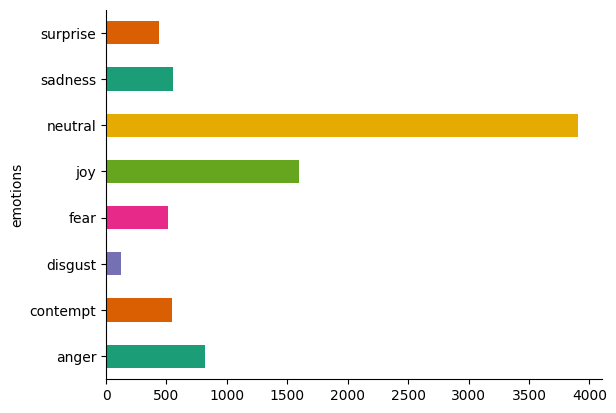

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['emotions'].value_counts()

neutral     3909
joy         1596
anger        819
sadness      558
contempt     542
fear         514
surprise     441
disgust      127
Name: emotions, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['utterances'], df['emotions'], test_size=0.2, random_state=42)

In [ ]:
tfidf=TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)

In [ ]:
X_test = tfidf.transform(X_test)

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
X_train

<6804x9478 sparse matrix of type '<class 'numpy.float64'>'
	with 67123 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_resampled

<24864x9478 sparse matrix of type '<class 'numpy.float64'>'
	with 409154 stored elements in Compressed Sparse Row format>

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.17      0.04      0.07       168
    contempt       0.31      0.03      0.06       119
     disgust       0.00      0.00      0.00        28
        fear       0.20      0.02      0.04        83
         joy       0.47      0.18      0.26       313
     neutral       0.49      0.86      0.62       801
     sadness       0.58      0.10      0.17       107
    surprise       0.29      0.34      0.31        83

    accuracy                           0.47      1702
   macro avg       0.31      0.20      0.19      1702
weighted avg       0.42      0.47      0.38      1702



In [ ]:
confusion_matrix(y_test, y_pred)

array([[  7,   1,   0,   1,   6, 151,   0,   2],
       [  2,   4,   1,   1,   5, 104,   0,   2],
       [  2,   2,   0,   0,   2,  20,   0,   2],
       [  1,   0,   0,   2,   5,  70,   3,   2],
       [  2,   0,   0,   0,  55, 239,   2,  15],
       [ 22,   5,   0,   3,  40, 686,   2,  43],
       [  1,   1,   0,   2,   2,  87,  11,   3],
       [  4,   0,   0,   1,   1,  48,   1,  28]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.48


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.36


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.46650998824911866


In [ ]:
y_train=y_train.map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})
y_test=y_test.map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
boost = xgb.XGBClassifier(objective='multi:softmax', num_class=8)
boost.fit(X_train, y_train)

y_pred = boost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4811985898942421


LogisticRegression
SVC
MultinomialNB
XGboost
ada all with oversampling got 49 percent

In [ ]:
df_val=pd.read_csv('/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task1val.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train=df['utterances']
X_test=df_val['utterances']
y_train=df['emotions']
y_test=df_val['emotions']

In [ ]:
tfidf=TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)

In [ ]:
X_test = tfidf.transform(X_test)

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
X_train

<8506x10695 sparse matrix of type '<class 'numpy.float64'>'
	with 84068 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_resampled

<31272x10695 sparse matrix of type '<class 'numpy.float64'>'
	with 500009 stored elements in Compressed Sparse Row format>

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.11      0.08      0.09       118
    contempt       0.29      0.03      0.05        74
     disgust       0.50      0.05      0.09        21
        fear       0.25      0.05      0.08        88
         joy       0.48      0.22      0.30       228
     neutral       0.49      0.84      0.62       633
     sadness       0.55      0.05      0.09       126
    surprise       0.34      0.18      0.24        66

    accuracy                           0.46      1354
   macro avg       0.37      0.19      0.19      1354
weighted avg       0.43      0.46      0.38      1354



In [ ]:
confusion_matrix(y_test, y_pred)

array([[  5,   1,   0,   1,   3, 153,   0,   5],
       [  1,   3,   1,   0,   7, 105,   0,   2],
       [  2,   1,   0,   0,   2,  21,   0,   2],
       [  1,   0,   0,   3,   5,  70,   2,   2],
       [  2,   0,   0,   0,  57, 241,   0,  13],
       [ 12,   5,   0,  10,  40, 680,   3,  51],
       [  1,   1,   0,   2,   4,  88,   7,   4],
       [  3,   0,   0,   1,   3,  46,   1,  29]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.48


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task1test.csv")

In [ ]:
df_test.sample(10)

,Unnamed: 0,speakers,utterances
853,853,madhusudan,hein
794,794,sahil,toh fir iski photographs dekh kar tension unhe...
178,178,sahil,dad kya kiya
96,96,maya,to chaku lekar khush ho jayegi ki mummy ji gai...
247,247,monisha,dhire daliyega dhire daliyega please dhire dal...
1556,1556,maya,"nahin, main aisi chizon mein vishwas nahin karti."
874,874,maya,indravadan!
191,191,indravardhan,hahhaha
1192,1192,maya,hello
667,667,sahil,a...mom..aapke paas extra pen hoga?


In [ ]:
y_test=df_test['utterances']

In [ ]:
tfidf=TfidfVectorizer()
y_test = tfidf.fit_transform(y_test)

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
y_pred[1579]

IndexError: index 1579 is out of bounds for axis 0 with size 1354

In [ ]:
with open('answer.txt', 'w') as file:
    file.write(y_pred)

TypeError: write() argument must be str, not numpy.ndarray

In [ ]:
import numpy as np

with open('answer.txt', 'w') as file:
    for value in y_pred:
        file.write(str(value) + '\n')

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.36


In [ ]:
y_train=y_train.map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
y_test=y_test.map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
boost = xgb.XGBClassifier(objective='multi:softmax', num_class=8)
boost.fit(X_train, y_train)

y_pred = boost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.48670605612998524


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4771048744460857


#### Word2Vec Embedding

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task1.csv")

In [ ]:
df

,Unnamed: 0,speakers,utterances,emotions
0,0,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,1,indu,"ok, chalo rosesh chalo bahar",contempt
2,2,rosesh,momma! hath chhodiye dad!,anger
3,3,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,4,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral
...,...,...,...,...
8501,8501,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness
8502,8502,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger
8503,8503,maya,ahan!,joy
8504,8504,sita or geeta,goodbye!,fear


In [ ]:
df=df.drop(['Unnamed: 0','speakers'],axis=1)

In [ ]:
df

,utterances,emotions
0,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,"ok, chalo rosesh chalo bahar",contempt
2,momma! hath chhodiye dad!,anger
3,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,"indravadan, tum kitne salo se ye joke maar rah...",neutral
...,...,...
8501,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness
8502,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger
8503,ahan!,joy
8504,goodbye!,fear


In [ ]:
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_lg

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
def get_vector(x):
    doc = nlp(x)
    vector = doc.vector
    return vector

In [ ]:
df['vector'] = df['utterances'].apply(lambda x: get_vector(x))

In [ ]:
df.head()

,utterances,emotions,vector
0,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,"[-0.23793001, 1.8304019, -0.08763535, -0.85384..."
1,"ok, chalo rosesh chalo bahar",contempt,"[-0.15551166, -0.4910717, -0.25527, -0.0622716..."
2,momma! hath chhodiye dad!,anger,"[2.3756335, -1.622975, -1.9197232, -1.8036, -0..."
3,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral,"[0.5293273, 0.43473712, -1.403753, 0.12818831,..."
4,"indravadan, tum kitne salo se ye joke maar rah...",neutral,"[0.030380342, 0.81101567, -0.78983617, -0.3291..."


In [ ]:
df.shape

(8506, 3)

In [ ]:
X=df['vector'].to_numpy()
X = X.reshape(-1, 1)

In [ ]:
X.shape

(8506, 1)

In [ ]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [ ]:
X.shape

(8506, 300)

In [ ]:
y=df['emotions']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((6804, 300), (1702, 300))

In [ ]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.18      0.04      0.06       164
    contempt       0.12      0.02      0.03       109
     disgust       0.00      0.00      0.00        25
        fear       0.05      0.01      0.02       103
         joy       0.43      0.24      0.30       319
     neutral       0.48      0.85      0.61       782
     sadness       0.20      0.04      0.07       112
    surprise       0.25      0.10      0.15        88

    accuracy                           0.45      1702
   macro avg       0.21      0.16      0.16      1702
weighted avg       0.35      0.45      0.36      1702



In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       164
    contempt       0.00      0.00      0.00       109
     disgust       0.00      0.00      0.00        25
        fear       0.50      0.01      0.02       103
         joy       0.50      0.15      0.24       319
     neutral       0.47      0.96      0.64       782
     sadness       0.00      0.00      0.00       112
    surprise       0.50      0.07      0.12        88

    accuracy                           0.48      1702
   macro avg       0.25      0.15      0.13      1702
weighted avg       0.37      0.48      0.34      1702



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(max_iter=10000)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.09      0.01      0.02       164
    contempt       0.17      0.01      0.02       109
     disgust       0.00      0.00      0.00        25
        fear       0.00      0.00      0.00       103
         joy       0.43      0.23      0.30       319
     neutral       0.48      0.88      0.62       782
     sadness       0.29      0.04      0.08       112
    surprise       0.35      0.14      0.20        88

    accuracy                           0.46      1702
   macro avg       0.23      0.16      0.15      1702
weighted avg       0.36      0.46      0.36      1702



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
my_list=["neutral"]*1580

In [ ]:
my_list1=[0]*16331

In [ ]:
my_list1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
with open('answer.txt', 'w') as file:
    for value in my_list:
        file.write(str(value) + '\n')
    for value in my_list1:
        file.write(str(value) + '\n')